In [16]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [12]:
data_dir = '/mnt/hdd3/AffectNet/Manually_Annotated_compressed/Manually_Annotated_Images'

In [22]:
train_path = '/mnt/hdd3/AffectNet/Manually_Annotated_compressed/training_clean_seven.csv'

train_df = pd.read_csv(train_path)

remove_rows = []
for idx, row in tqdm(enumerate(train_df.iterrows()), total=len(train_df)):
    row = row[1]
    img_path = os.path.join(data_dir, row.subDirectory_filePath)
    if not os.path.isfile(img_path):
        remove_rows.append([idx, row])

In [24]:
remove_rows

[]

In [21]:
val_path = '/mnt/hdd3/AffectNet/Manually_Annotated_compressed/valid_seven.csv'

val_df = pd.read_csv(val_path)

val_df.keys()

remove_rows = []
for idx, row in tqdm(enumerate(val_df.iterrows()), total=len(val_df)):
    row = row[1]
    img_path = os.path.join(data_dir, row.subDirectory_filePath)
    if not os.path.isfile(img_path):
        remove_rows.append([idx, row])

In [30]:
print(val_df.columns)

Index(['subDirectory_filePath', 'face_x', 'face_y', 'face_width',
       'face_height', 'facial_landmarks', 'expression', 'valence', 'arousal'],
      dtype='object')


In [32]:
train_df['subDirectory_filePath'][0]

'689/737db2483489148d783ef278f43f486c0a97e140fc4b6b61b84363ca.jpg'

In [35]:
x = val_df['face_x'][0]
w = val_df['face_width'][0]
y = val_df['face_y'][0]
h = val_df['face_height'][0]

In [41]:
import cv2
import matplotlib.pyplot as plt

In [80]:
path = os.path.join(data_dir, val_df['subDirectory_filePath'][0])

In [81]:
img_arr = cv2.imread(path)[..., ::-1]

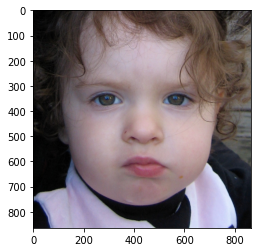

In [82]:
plt.imshow(img_arr)

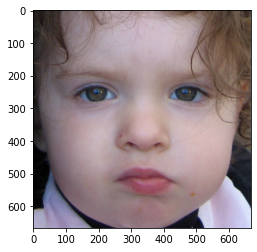

In [94]:
plt.imshow(img_arr[y:y + h, x:x + w, ...])

In [95]:
img_arr_umat = cv2.UMat(img_arr)

In [96]:
img_arr_umat = cv2.circle(img_arr_umat, (x, y), 50, (255, 0, 0), thickness=-1)

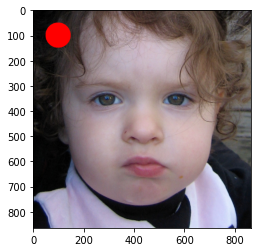

In [97]:
plt.imshow(img_arr_umat.get())

In [114]:
landmarks = np.array(list(map(lambda x: int(float(x)), val_df.facial_landmarks[0].split(';'))))

In [115]:
landmarks

array([ 98, 341, 107, 422, 123, 503, 144, 576, 181, 644, 240, 697, 306,
       739, 371, 768, 434, 778, 497, 769, 558, 736, 616, 695, 672, 647,
       706, 583, 727, 508, 742, 425, 747, 335, 148, 301, 196, 269, 256,
       266, 320, 276, 381, 296, 485, 292, 552, 274, 614, 263, 674, 271,
       714, 309, 435, 354, 435, 397, 436, 440, 436, 485, 374, 531, 404,
       534, 435, 536, 466, 534, 496, 530, 226, 358, 269, 337, 317, 339,
       351, 369, 312, 379, 262, 379, 513, 366, 553, 334, 599, 335, 636,
       355, 604, 374, 557, 376, 348, 630, 384, 610, 420, 596, 439, 602,
       460, 596, 493, 615, 528, 634, 493, 660, 462, 671, 438, 673, 418,
       670, 384, 660, 367, 628, 419, 619, 438, 621, 460, 619, 510, 632,
       460, 630, 438, 631, 419, 627])

In [110]:
landmarks = landmarks.reshape((68, 2))

In [111]:
for x, y in landmarks:
    img_arr_umat = cv2.circle(img_arr_umat, (x, y), 10, (255, 0, 0), thickness=-1)

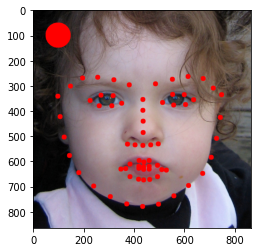

In [112]:
plt.imshow(img_arr_umat.get())

In [119]:
landmarks = landmarks.flatten()

In [118]:
import torch

In [129]:
landmarks_ts = torch.from_numpy(landmarks).type(torch.float)

In [134]:
landmarks[0:10] += 1
landmarks_ts_2 = torch.from_numpy(landmarks).type(torch.float)

In [135]:
torch.nn.MSELoss()(landmarks_ts, landmarks_ts_2)

tensor(0.0735)